# Analysis of Instacar Data - Part 2

#### 5. Import data file
#### 6. Deparment & Product Analysis
####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6.1 Popular departments by orders
####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6.2 Revenue by Departments
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6.3 Department by Pricing Range
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6.4 Popular Departments by Region
#### 7. Customer Loyalty Type Analysis
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 7.1 Revenue Distribution by Customer Loyalty Type
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 7.2 Regular and Loyal Customer Purchasing Habits
#### 8. Family Status, Dependants & Age Correlation
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.1 Age Distribution of Family Statuses
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.2 Customers vs dependants (kids / without kids)
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.3 Ordering Habits of Married Customers
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.4 Ordering habits of groups with no kids¶
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 8.5 Ordering habits of customers living with parents and siblings¶
#### 9. High vs Low Income 
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9.1 Create income flags ( < 200,000 and > 200,000)
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9.2 Customers and Revenue by Income
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9.3 Reorder Rate
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9.4 Department Preferences by Low Income Earners
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 9.5 Department Preferences by High Income Earners
#### 10. Export Dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## 5. Import data files

#### Import orders_product_cust_types.pkl

In [2]:
# loading orders_product_cust_types.pkl file into a dataframe
path = r'/Users/patel/Documents/CF-Data Anaylst Course/Achievement-4/Instacart Basket Analysis-Oct 2023/'

df_ords_cust = pd.read_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prod_cust_without_pii.pkl'))
df_ords_cust.shape

(32404859, 29)

In [3]:
df_ords_cust.head()

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,median_days_prior_purchase,frequency_cust_type,gender,state,age,n_dependants,fam_status,income,region,activity_type
0,2539329,1,1,2,8,NaN,196,0,Soda,7,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity
1,2254736,1,4,4,7,29.0,25133,1,Organic String Cheese,16,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,25133,0,Organic String Cheese,16,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity
3,2550362,1,10,4,8,30.0,13032,1,Cinnamon Toast Crunch,14,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity
4,550135,1,7,1,9,20.0,13032,1,Cinnamon Toast Crunch,14,...,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity


In [4]:
df_ords_cust.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'reordered', 'product_name', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busy_slow_days', 'busiest_hours',
       'max_orders', 'loyalty_flag', 'mean_expenses', 'spender_type',
       'median_days_prior_purchase', 'frequency_cust_type', 'gender', 'state',
       'age', 'n_dependants', 'fam_status', 'income', 'region',
       'activity_type'],
      dtype='object')

In [5]:
df_ords_cust.groupby('price_range_loc', as_index=False).agg({
    'order_id': 'count', 'prices':'sum'
})

,price_range_loc,order_id,prices
0,High-range product,417678,8502571.0
1,Low-range product,10126321,30614600.0
2,Mid-range product,21860860,213308944.0


#### Import department.csv

In [6]:
df_depts = pd.read_csv(os.path.join(path, '02 Data/Prepared Data/departments_wrangled.csv'),
                      index_col=0)
df_depts.head(25)

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [7]:
# renameing the index column and department_id
df_depts.index.names = ['department_id']

In [8]:
#to flatten the multi-index to access the department_id
df_depts.reset_index()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 6. Deparment & Product Analysis

#### Merge departments and ords_cust datasets

In [9]:
# use left join to combine df_ords_cust with department to get the names
df_dept_cust_ords = df_ords_cust.merge(df_depts, on='department_id', how='left', indicator=True)
df_dept_cust_ords

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,gender,state,age,n_dependants,fam_status,income,region,activity_type,department,_merge
0,2539329,1,1,2,8,NaN,196,0,Soda,7,...,Female,Alabama,31,3,married,40423,South,High activity,beverages,both
1,2254736,1,4,4,7,29.0,25133,1,Organic String Cheese,16,...,Female,Alabama,31,3,married,40423,South,High activity,dairy eggs,both
2,473747,1,3,3,12,21.0,25133,0,Organic String Cheese,16,...,Female,Alabama,31,3,married,40423,South,High activity,dairy eggs,both
3,2550362,1,10,4,8,30.0,13032,1,Cinnamon Toast Crunch,14,...,Female,Alabama,31,3,married,40423,South,High activity,breakfast,both
4,550135,1,7,1,9,20.0,13032,1,Cinnamon Toast Crunch,14,...,Female,Alabama,31,3,married,40423,South,High activity,breakfast,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,3221676,99999,2,0,20,5.0,14221,1,Three Cheese Ravioli In Egg Pasta,9,...,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,dry goods pasta,both
32404855,438388,99999,17,1,7,9.0,19048,1,Organic Butternut Squash,4,...,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,produce,both
32404856,1019679,99999,1,2,16,NaN,30233,0,Organic Large Brown Grade AA Cage Free Eggs,16,...,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,dairy eggs,both
32404857,757569,99999,29,0,15,4.0,11182,1,Baby Spinach,4,...,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,produce,both


In [10]:
# check thee merge has occurred correctly
df_dept_cust_ords['_merge'].value_counts()

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [11]:
df_dept_cust_ords.drop(columns=['_merge'], inplace=True)

In [12]:
df_dept_cust_ords.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'reordered', 'product_name', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busy_slow_days', 'busiest_hours',
       'max_orders', 'loyalty_flag', 'mean_expenses', 'spender_type',
       'median_days_prior_purchase', 'frequency_cust_type', 'gender', 'state',
       'age', 'n_dependants', 'fam_status', 'income', 'region',
       'activity_type', 'department'],
      dtype='object')

#### Export the df_dept_cust_ords into pickle

In [13]:
df_dept_cust_ords.to_pickle(os.path.join(path, '02 Data/Prepared Data/ords_prod_cust_without_pii_departments.pkl'))

### 6.1 Popular departments by orders

In [14]:
# group departments to calculate number of orders
df_dept_no_orders = df_dept_cust_ords.groupby(['department_id','department'], 
                                as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

In [15]:
# rename column from order_id to no_of_orders
df_dept_no_orders.rename(columns={'order_id': "no_of_orders", 'prices': 'total_revenue'}, inplace=True)

In [16]:
# double check the sum of no_of_orders equals to number of rows in ords_prod_cust dataset
df_dept_no_orders['no_of_orders'].sum()

32404859

In [17]:
# Sort the dataframe by highest orders
df_dept_no_orders.sort_values(by=['no_of_orders'], ascending=False, inplace=True)

In [18]:
df_dept_no_orders

,department_id,department,no_of_orders,total_revenue
3,4,produce,9479291,7.566094e+07
15,16,dairy eggs,5398747,4.495612e+07
18,19,snacks,2887550,1.234554e+07
6,7,beverages,2688123,2.064614e+07
0,1,frozen,2234743,1.728921e+07
12,13,pantry,1875369,1.502066e+07
2,3,bakery,1172428,9.208026e+06
14,15,canned goods,1068058,8.053132e+06
19,20,deli,1051249,8.177352e+06
8,9,dry goods pasta,866627,6.369954e+06


#### Stacked bar chart: Total orders by department

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Number of Orders by Department')

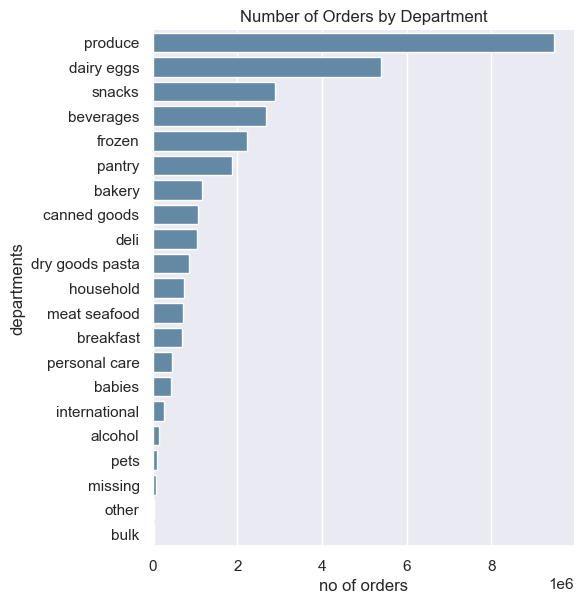

In [19]:
sns.set_theme()
bar_dept_orders = sns.catplot(x='no_of_orders', y='department', data=df_dept_no_orders, 
                              kind='bar', color="#598BAF", height=6)
bar_dept_orders.set_axis_labels('no of orders', 'departments')
plt.title("Number of Orders by Department")

#### Observations

1. Most commonly ordered items are from Produce departments
2. Bulk items are least ordered
3. Top 3 common departments are produce, dairy eggs and snacks
4. Least common departments are bulk, other and missing

In [20]:
bar_dept_orders.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_dept_orders.png'))

#### Investigate Produce (most ordered items)

In [21]:
df_produce = df_dept_cust_ords[df_dept_cust_ords['department'] == 'produce']

In [22]:
df_produce_prod_orders = df_produce.groupby(['department', 'product_name'], as_index=False)['order_id'].count()
df_produce_prod_orders.sort_values(by=('order_id'), ascending=False)

,department,product_name,order_id
119,produce,Banana,472565
113,produce,Bag of Organic Bananas,379450
1181,produce,Organic Strawberries,264683
845,produce,Organic Baby Spinach,241921
992,produce,Organic Hass Avocado,213584
...,...,...,...
1659,produce,Yellow Cherry Tomato,3
415,produce,Eve Apple,3
524,produce,Graffiti Eggplant,2
63,produce,Baby Beets,2


### 6.2 Revenue by Departments

#### Stacked Bar chart: Compare department revenues

In [23]:
df_dept_no_orders.sort_values(by=['total_revenue'], ascending=False, inplace=True)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, "Department's Total Revenue")

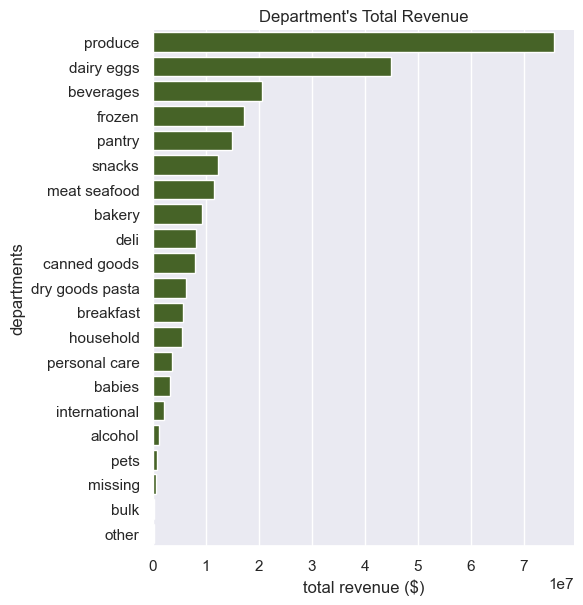

In [24]:
bar_dept_rev = sns.catplot(x='total_revenue', y='department', data=df_dept_no_orders, 
                           height=6, kind='bar', color="#466D1D")
bar_dept_rev.set_axis_labels("total revenue ($)", "departments")
plt.title("Department's Total Revenue")

In [25]:
bar_dept_rev.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_dept_rev.png'))

### 6.3 Department by Pricing Range

#### Subset data by grouping into pricing range

In [26]:
# Group dataset by department and price range. 
df_dept_price_range = df_dept_cust_ords.groupby(['department_id', 'department', 'price_range_loc'],
                                    as_index=False).agg({'product_id': 'nunique'})

# order in descending order of number of products
df_dept_price_range.sort_values(by=['product_id'], ascending=False, inplace=True)

#### Grouped bar graph

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Price Range of Products in Departments')

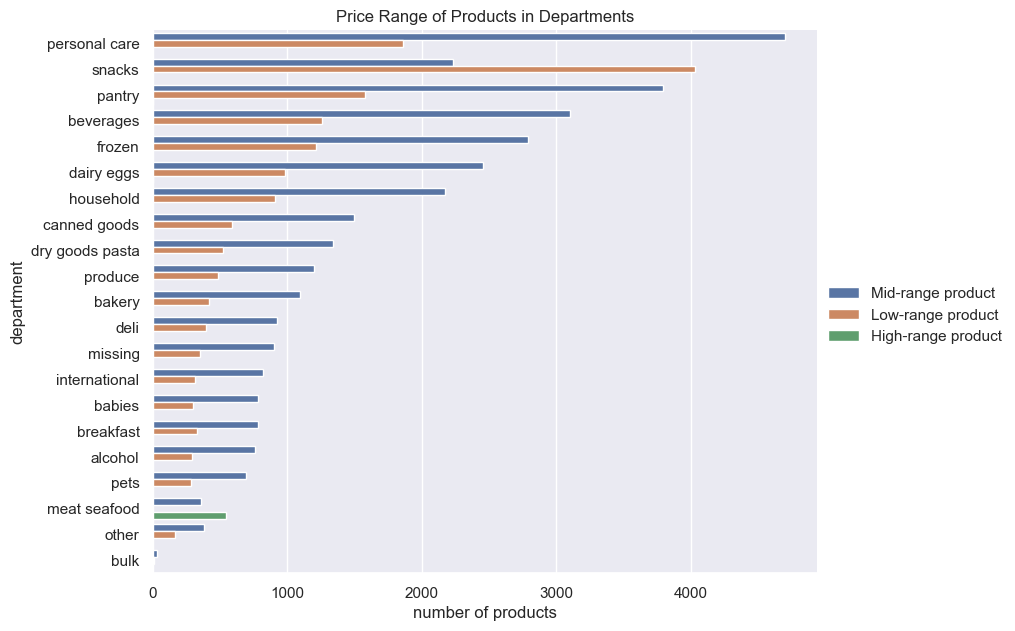

In [27]:
bar_dept_price_range = sns.catplot(y='department', x='product_id', data=df_dept_price_range, 
                                   hue='price_range_loc', kind='bar', height=6.27, aspect=8.7/6.27)
bar_dept_price_range.legend.set_title("")
bar_dept_price_range.set_axis_labels("number of products", "department")
plt.title('Price Range of Products in Departments', fontsize='12')

#### Observations

1. Snack is the only department that has more 'low range' products. It also has he most low'range products
2. Personal care has most products, especially the mid-range product
3. Meat department is the only department with high-range products

In [28]:
bar_dept_price_range.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_dept_price_range.png'))

### 6.4 Popular Departments by Region

In [29]:
df_dept_cust_ords

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,frequency_cust_type,gender,state,age,n_dependants,fam_status,income,region,activity_type,department
0,2539329,1,1,2,8,NaN,196,0,Soda,7,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,beverages
1,2254736,1,4,4,7,29.0,25133,1,Organic String Cheese,16,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,dairy eggs
2,473747,1,3,3,12,21.0,25133,0,Organic String Cheese,16,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,dairy eggs
3,2550362,1,10,4,8,30.0,13032,1,Cinnamon Toast Crunch,14,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,breakfast
4,550135,1,7,1,9,20.0,13032,1,Cinnamon Toast Crunch,14,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,3221676,99999,2,0,20,5.0,14221,1,Three Cheese Ravioli In Egg Pasta,9,...,Frequent customer,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,dry goods pasta
32404855,438388,99999,17,1,7,9.0,19048,1,Organic Butternut Squash,4,...,Frequent customer,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,produce
32404856,1019679,99999,1,2,16,NaN,30233,0,Organic Large Brown Grade AA Cage Free Eggs,16,...,Frequent customer,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,dairy eggs
32404857,757569,99999,29,0,15,4.0,11182,1,Baby Spinach,4,...,Frequent customer,Male,Pennsylvania,40,1,married,55497,Northeast,High activity,produce


#### Subset data by grouping into departments and region

In [30]:
df_dept_region = df_dept_cust_ords.groupby(['department', 'region'],
                                    as_index=False).agg({'order_id': 'count'})
df_dept_region.sort_values(by=['order_id'], ascending=False, inplace=True)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Number of Orders by Department in Regions')

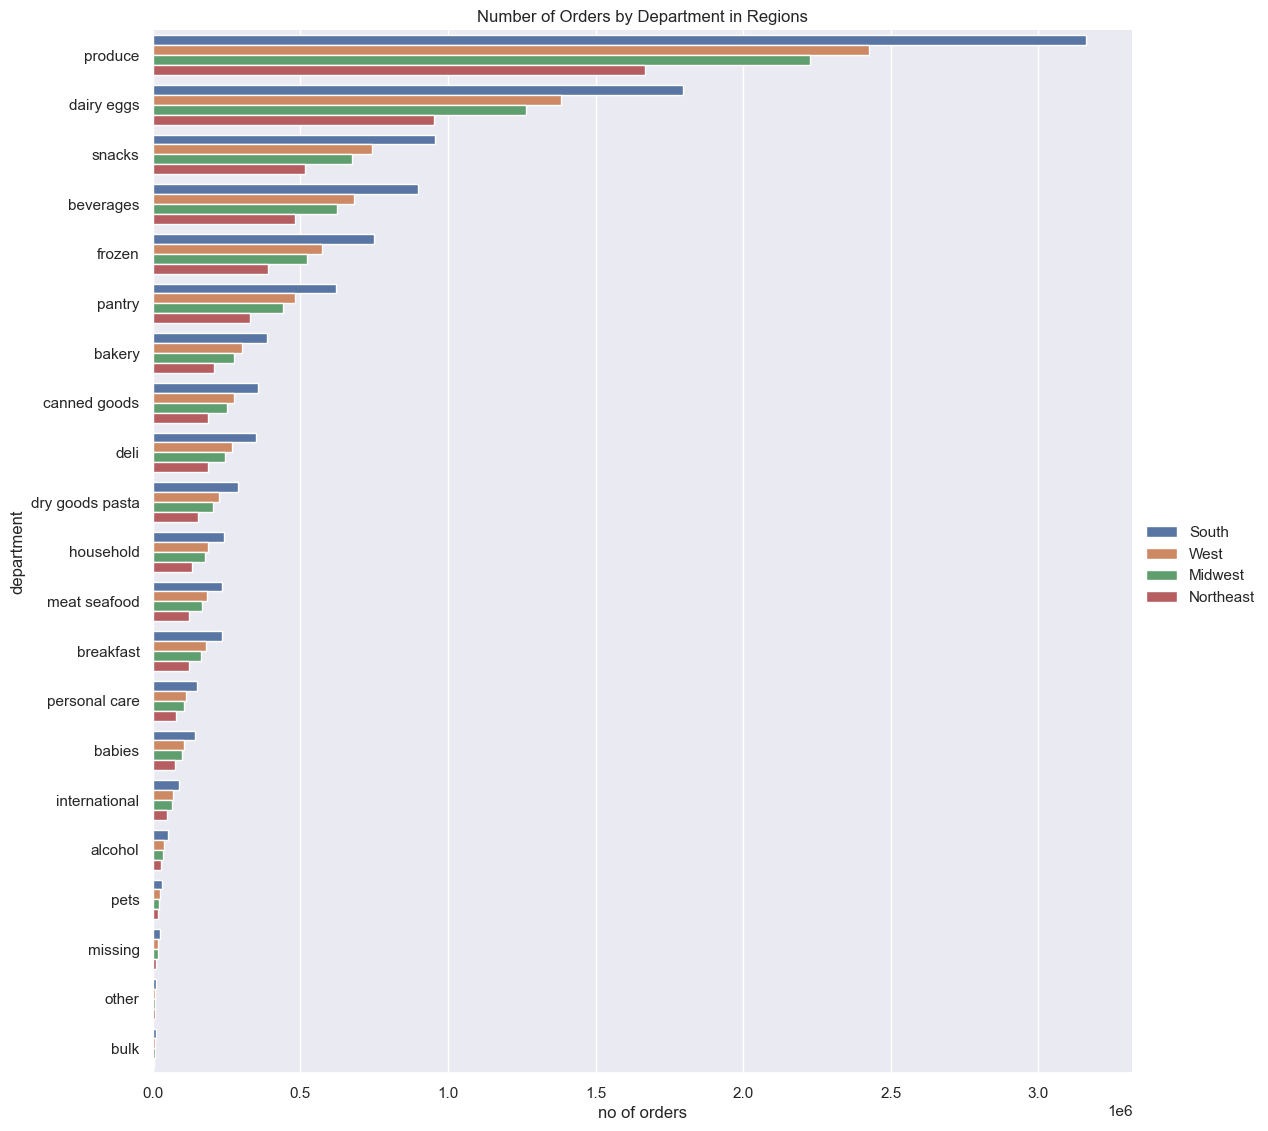

In [31]:
bar_dept_region = sns.catplot(y='department', x='order_id', data=df_dept_region, 
                                   hue='region', kind='bar', height=11.27, aspect=11.7/11.27)
bar_dept_region.legend.set_title("")
bar_dept_region.set_axis_labels("no of orders", "department")
plt.title('Number of Orders by Department in Regions', fontsize='12')

In [32]:
bar_dept_region.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_dept_region.png'))

## Customer Profiling
----

## 7. Customer Loyalty Type Analysis

### 7.1 Revenue Distribution by Customer Loyalty Type

In [33]:
df_rev_cust_type = df_dept_cust_ords.groupby(['loyalty_flag'], as_index=False).agg({'prices':'sum'})
df_rev_cust_type

,loyalty_flag,prices
0,Loyal customer,79933824.0
1,New customer,48701688.0
2,Regular customer,123790608.0


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Revenue Distribution by Customer Type')

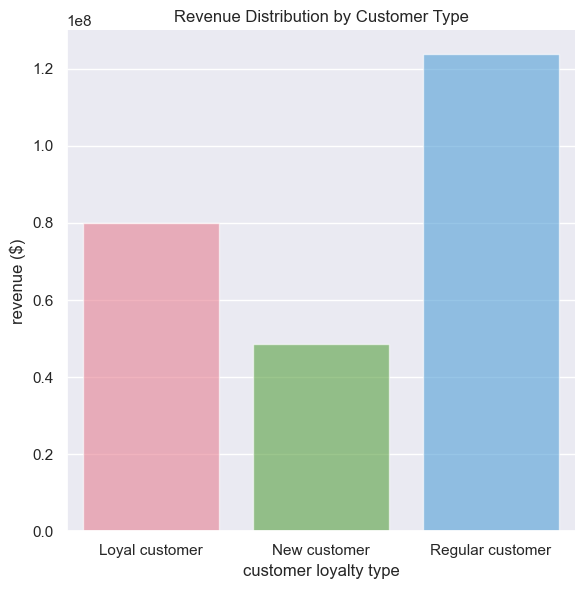

In [34]:
sns.set_theme()
bar_rev_cust_type = sns.catplot(y='prices', x='loyalty_flag', data=df_rev_cust_type, 
                                   kind='bar', palette='husl', alpha=0.6, height=6)

bar_rev_cust_type.set_axis_labels("customer loyalty type", "revenue ($)")
plt.title('Revenue Distribution by Customer Type', fontsize='12')

In [35]:
bar_rev_cust_type.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_rev_cust_type.png'))

#### Check Reorder Habits

In [36]:
df_dept_cust_ords.head()

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,frequency_cust_type,gender,state,age,n_dependants,fam_status,income,region,activity_type,department
0,2539329,1,1,2,8,NaN,196,0,Soda,7,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,beverages
1,2254736,1,4,4,7,29.0,25133,1,Organic String Cheese,16,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,dairy eggs
2,473747,1,3,3,12,21.0,25133,0,Organic String Cheese,16,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,dairy eggs
3,2550362,1,10,4,8,30.0,13032,1,Cinnamon Toast Crunch,14,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,breakfast
4,550135,1,7,1,9,20.0,13032,1,Cinnamon Toast Crunch,14,...,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,breakfast


In [37]:
df_reorder_loyalty = df_dept_cust_ords.groupby(['loyalty_flag', 'reordered'], as_index=False).agg({
    'order_id':'count'
})
df_reordered_total = df_dept_cust_ords.groupby(['loyalty_flag'], as_index=False).agg({
    'order_id':'count'
})

In [38]:
df_loyalty_reorder_percent = df_reorder_loyalty.merge(df_reordered_total, how='left', on='loyalty_flag')

In [39]:
df_loyalty_reorder_percent['reorder_percent'] = (df_loyalty_reorder_percent['order_id_x']/ 
                        df_loyalty_reorder_percent['order_id_y'] *100)
    

In [40]:
df_loyalty_reorder_percent

,loyalty_flag,reordered,order_id_x,order_id_y,reorder_percent
0,Loyal customer,0,2680619,10284093,26.065682
1,Loyal customer,1,7603474,10284093,73.934318
2,New customer,0,4069872,6243990,65.180630
3,New customer,1,2174118,6243990,34.819370
4,Regular customer,0,6548875,15876776,41.248141
5,Regular customer,1,9327901,15876776,58.751859


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Number of Orders Reordered by Regular, New and Loyal Customers')

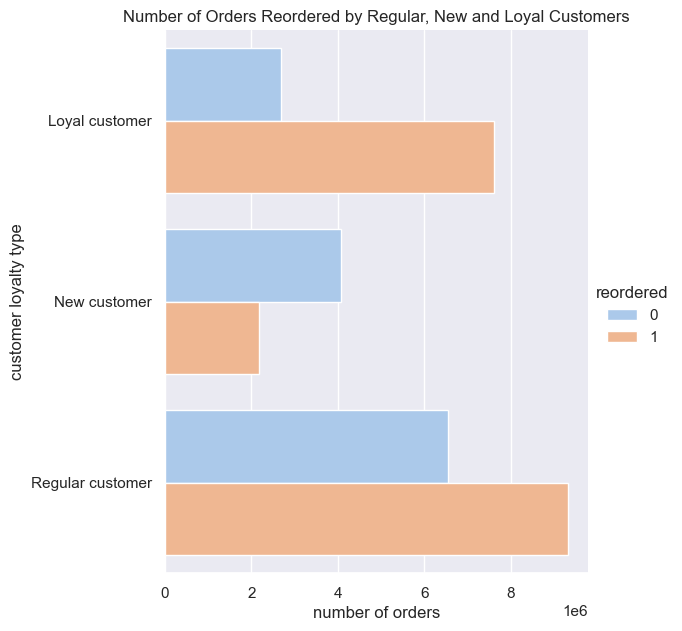

In [41]:
bar_reorder_loyal = sns.catplot(x="order_id_x",y="loyalty_flag",kind='bar',
                               data=df_loyalty_reorder_percent, hue='reordered',
                              height=6.27, palette='pastel')

bar_reorder_loyal.set_axis_labels("number of orders", "customer loyalty type")
plt.title("Number of Orders Reordered by Regular, New and Loyal Customers")

In [42]:
bar_reorder_loyal.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_reorder_loyal.png'))

### 7.2 Regular and Loyal Customer Purchasing Habits

#### Subset dataset with Regular and Loyal Customers

In [151]:
df_reg_loyal_cust = df_dept_cust_ords[df_dept_cust_ords['loyalty_flag'].isin(['Regular customer', 'Loyal customer'])]
df_reg_loyal_cust.shape

(26160869, 30)

In [152]:
# check the subsetting of dataset
df_reg_loyal_cust['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
Name: count, dtype: int64

In [45]:
df_dept_cust_type = df_reg_loyal_cust.groupby(['department_id','department', 'loyalty_flag'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_dept_cust_type.sort_values(by=['order_id'], ascending=False, inplace=True)

In [46]:
df_dept_cust_type

,department_id,department,loyalty_flag,order_id,prices
7,4,produce,Regular customer,4595293,3.672752e+07
6,4,produce,Loyal customer,3147376,2.502381e+07
31,16,dairy eggs,Regular customer,2596419,2.159963e+07
30,16,dairy eggs,Loyal customer,1830707,1.529096e+07
37,19,snacks,Regular customer,1410149,6.035370e+06
13,7,beverages,Regular customer,1320235,1.013921e+07
1,1,frozen,Regular customer,1140000,8.840255e+06
36,19,snacks,Loyal customer,943150,4.026834e+06
25,13,pantry,Regular customer,922727,7.373324e+06
12,7,beverages,Loyal customer,855017,6.593016e+06


#### Group bar chart

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Popular Departments by Loyal and Regular Customers')

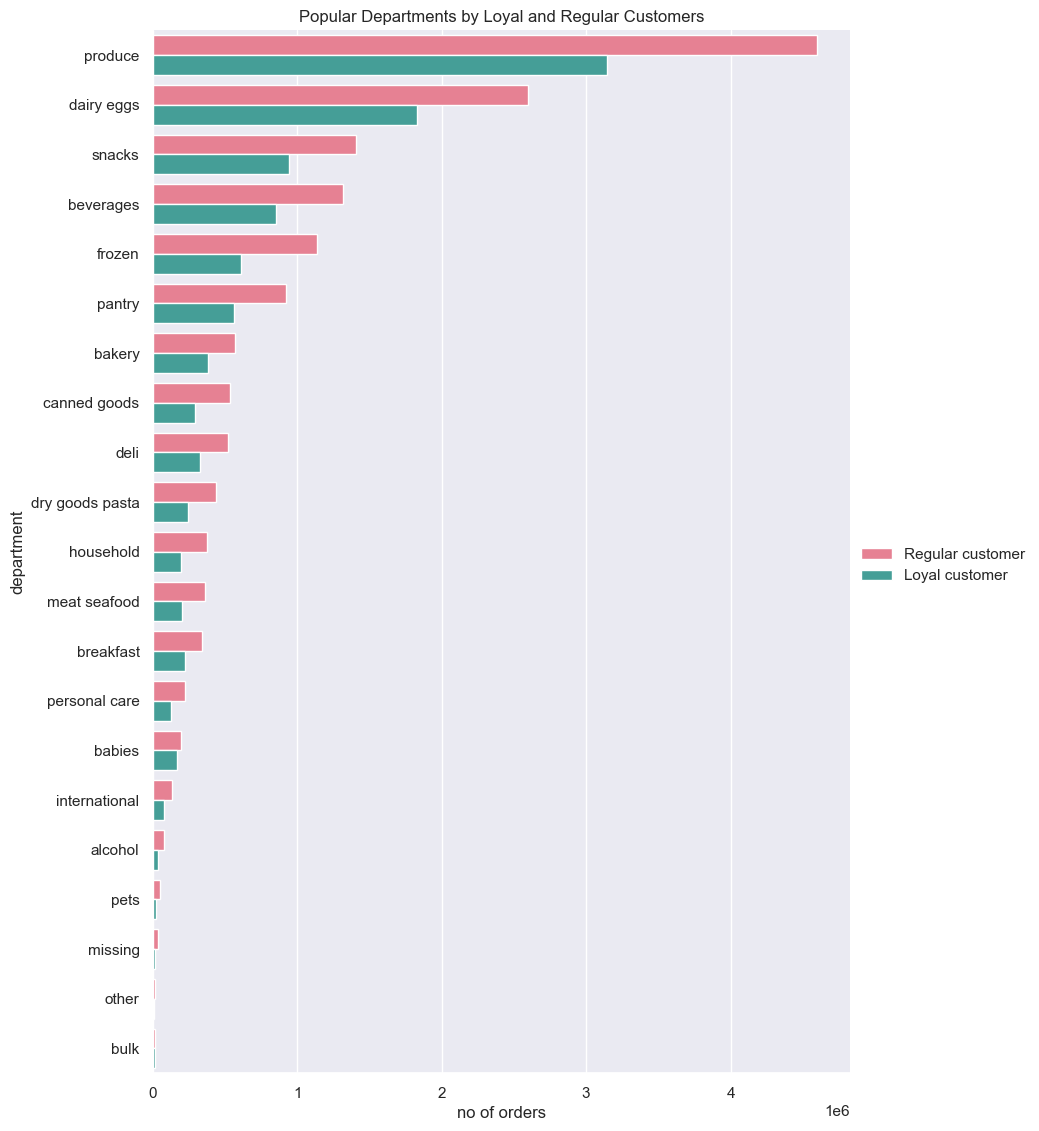

In [47]:
bar_dept_cust_type = sns.catplot(y='department', x='order_id', data=df_dept_cust_type, 
                                   hue='loyalty_flag', kind='bar', palette='husl', 
                                 height=11.27, aspect=9/11.27)
bar_dept_cust_type.legend.set_title("")
bar_dept_cust_type.set_axis_labels("no of orders", "department")
plt.title('Popular Departments by Loyal and Regular Customers', fontsize='12')

In [48]:
bar_dept_cust_type.savefig(os.path.join(path,'04 Analysis/Visualizations/bar_dept_cust_type.png'))

#### Top 10 preferred departments

In [49]:
df_top5 = df_dept_cust_type[df_dept_cust_type['department_id'].isin([4,16,19,7,1])]

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Top 5 Popular Departments of Loyal and Regular Customers')

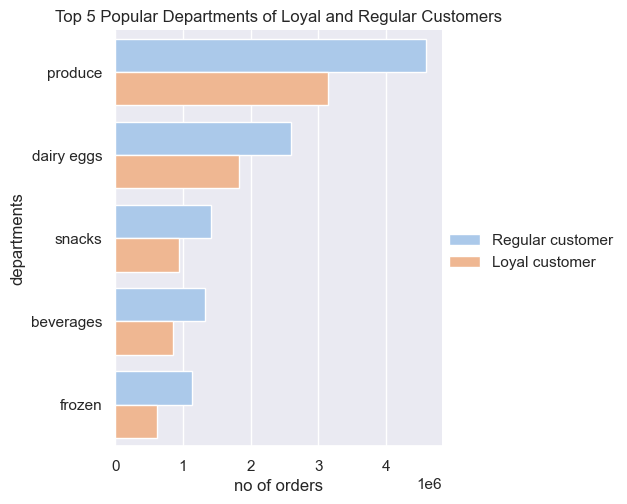

In [50]:
bar_top5_dept = sns.catplot(x='order_id', y='department' , data=df_top5, kind='bar', 
                  hue='loyalty_flag', palette='pastel')
bar_top5_dept.legend.set_title("")
bar_top5_dept.set_axis_labels("no of orders", "departments")
plt.title('Top 5 Popular Departments of Loyal and Regular Customers', fontsize='12')

#### Bottom 5 departments

In [51]:
df_bottom5 = df_dept_cust_type[df_dept_cust_type['department_id'].isin([2,10,21,8,5])]

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Bottom 5 Departments of Loyal and Regular Customers')

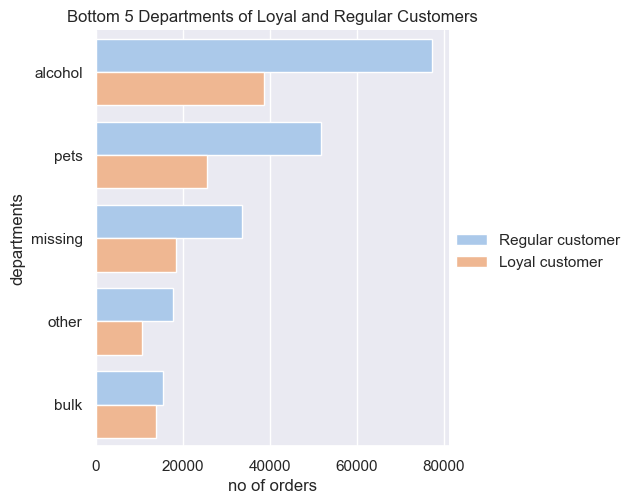

In [52]:
bar_bottom5_dept = sns.catplot(x='order_id', y='department' , data=df_bottom5, kind='bar', 
                  hue='loyalty_flag', palette='pastel')
bar_bottom5_dept.legend.set_title("")
bar_bottom5_dept.set_axis_labels("no of orders", "departments")
plt.title('Bottom 5 Departments of Loyal and Regular Customers', fontsize='12')

#### Export the graphs

In [53]:
bar_top5_dept.savefig(os.path.join(path,
                    '04 Analysis/Visualizations/bar_top5_dept.png'))
bar_bottom5_dept.savefig(os.path.join(path,
                    '04 Analysis/Visualizations/bar_bottom5_dept.png'))

#### Difference in buying habits of products

In [54]:
# Group by departments and product name and customer loyalty type
df_products_orders = df_reg_loyal_cust.groupby(['department','product_name', 'loyalty_flag'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum', 'mean_expenses':'sum'})


In [55]:
# sort in descending order of number of orders to get the top 10 products
df_products_orders.sort_values(by=['order_id'], ascending=False, inplace=True)

In [56]:
# top 10 products ordered by regular customer
df_products_orders[df_products_orders['loyalty_flag']=='Regular customer'].iloc[0:10] #.to_clipboard()

,department,product_name,loyalty_flag,order_id,prices,mean_expenses
78512,produce,Banana,Regular customer,233137,2.867585e+06,1.855267e+06
78500,produce,Bag of Organic Bananas,Regular customer,176251,1.815385e+06,1.371153e+06
80590,produce,Organic Strawberries,Regular customer,120510,8.797230e+05,9.431776e+05
79925,produce,Organic Baby Spinach,Regular customer,118926,9.751932e+05,9.374514e+05
80218,produce,Organic Hass Avocado,Regular customer,98590,3.943600e+05,7.653006e+05
79897,produce,Organic Avocado,Regular customer,89695,5.650785e+05,7.109950e+05
79585,produce,Large Lemon,Regular customer,77288,1.082032e+06,6.223492e+05
81230,produce,Strawberries,Regular customer,72026,9.363380e+04,5.486959e+05
79634,produce,Limes,Regular customer,69502,1.021679e+06,5.583271e+05
25472,dairy eggs,Organic Whole Milk,Regular customer,62273,7.970944e+05,5.036548e+05


In [57]:
# top 10 products ordered by loytalty customer
df_products_orders[df_products_orders['loyalty_flag']=='Loyal customer'].iloc[0:10]#.to_clipboard()

,department,product_name,loyalty_flag,order_id,prices,mean_expenses
78511,produce,Banana,Loyal customer,155260,1.909698e+06,1.230305e+06
78499,produce,Bag of Organic Bananas,Loyal customer,144304,1.486331e+06,1.121133e+06
80589,produce,Organic Strawberries,Loyal customer,105185,7.678505e+05,8.241293e+05
80217,produce,Organic Hass Avocado,Loyal customer,84207,3.368280e+05,6.538987e+05
79924,produce,Organic Baby Spinach,Loyal customer,79671,6.533022e+05,6.276135e+05
80462,produce,Organic Raspberries,Loyal customer,56291,2.476804e+05,4.356340e+05
25471,dairy eggs,Organic Whole Milk,Loyal customer,56273,7.202944e+05,4.540760e+05
79896,produce,Organic Avocado,Loyal customer,50398,3.175074e+05,3.989553e+05
79633,produce,Limes,Loyal customer,45155,6.637785e+05,3.613321e+05
79584,produce,Large Lemon,Loyal customer,44024,6.163360e+05,3.531392e+05


In [58]:
# sort by least ordered products and high prices
df_least_popular = df_products_orders.sort_values(by=['order_id', 'prices'], ascending=[True, False])

In [59]:
# least popular products with high revenue for regular customers
df_least_popular[df_least_popular['loyalty_flag']=='Regular customer'].iloc[0:10].to_clipboard()

In [60]:
# least popular products with high revenue for regular customers
df_least_popular[df_least_popular['loyalty_flag']=='Loyal customer'].iloc[0:10].to_clipboard()

#### Check for correlation between expenses by Regular / Loyalty Customers

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

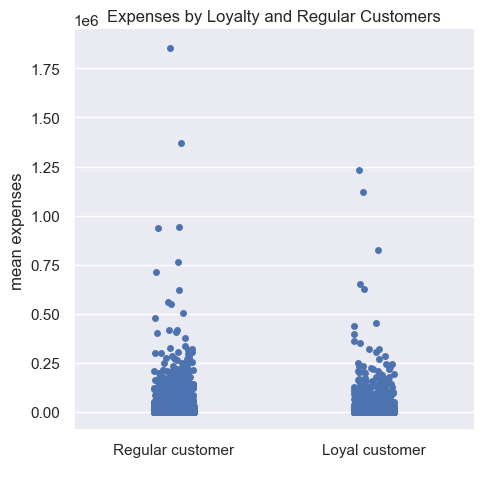

In [61]:
scatter_loyalty_expense = sns.catplot(x='loyalty_flag', y='mean_expenses', 
                                      data=df_products_orders)

plt.title("Expenses by Loyalty and Regular Customers")
scatter_loyalty_expense.set_axis_labels(' ', 'mean expenses')

#### Observation:

1. There is a direct correlation as orders increase, expenses increase
2. Regular customer spend more than loyal customers

In [62]:
scatter_loyalty_expense.savefig(os.path.join(path,
                        '04 Analysis/Visualizations/scatterplot_loyalty_spender.png'))

#### Spending Habits by Customer Loyalty Type

In [63]:
df_spender_type_cust = df_reg_loyal_cust.groupby(['loyalty_flag', 'spender_type'], 
                            as_index=False).agg({'user_id':'nunique'})
df_spender_type_cust

,loyalty_flag,spender_type,user_id
0,Loyal customer,High spender,69
1,Loyal customer,Low spender,16948
2,Regular customer,High spender,622
3,Regular customer,Low spender,76242


#### Observation:

Less than 1% of customers are high spenders within both Regular and Loyal customers

## 8. Family Status, Dependants & Age Correlation

### 8.1 Age Distribution of Family Statuses

In [153]:
# Group data based on family status to check age ranges
df_age_distribution = df_dept_cust_ords.groupby('fam_status').agg({'age': ['min', 'max', 'mean', 'median']})

In [154]:
df_age_distribution

age                      
                                 min max       mean median
fam_status                                                
divorced/widowed                  60  81  70.513004   71.0
living with parents and siblings  18  21  19.503707   19.0
married                           22  81  51.486493   51.0
single                            18  59  38.597507   39.0

In [155]:
# check the number of customers with family status and dependent types
df_dept_cust_ords[['fam_status', 'n_dependants']].value_counts()

fam_status                        n_dependants
married                           3               7622669
                                  2               7583180
                                  1               7550904
single                            0               5325691
divorced/widowed                  0               2771812
living with parents and siblings  1                530200
                                  3                512440
                                  2                507963
Name: count, dtype: int64

In [156]:
# double check that there are no married customers have 0 dependants
df_dept_cust_ords[(df_dept_cust_ords['fam_status']== "married") & (df_dept_cust_ords['n_dependants'] == 0)]

,order_id,user_id,number_of_orders,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,frequency_cust_type,gender,state,age,n_dependants,fam_status,income,region,activity_type,department


#### Observations

1. Divorced & Widowed -> no kids and age range 60-81
2. Living with parents & Siblings -> with kids (family) and age range 18-21
3. Single -> no kids and 18-59
4. Married -> with kids and 18-59

### 8.2 Customers vs dependants (kids / without kids)

#### Create a flag for customers with and without kids

In [157]:
# Create a kids_flag that indicates if a customer has kids or no kids
df_dept_cust_ords.loc[df_dept_cust_ords['n_dependants'] <=0, 'kids_flag'] = "No Kids"
df_dept_cust_ords.loc[df_dept_cust_ords['n_dependants'] > 0, 'kids_flag'] = "Has Kids"

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_97849/3614708397.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No Kids' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_dept_cust_ords.loc[df_dept_cust_ords['n_dependants'] <=0, 'kids_flag'] = "No Kids"


In [158]:
df_dept_cust_ords[['kids_flag', 'fam_status']].value_counts(dropna=False)

kids_flag  fam_status                      
Has Kids   married                             22756753
No Kids    single                               5325691
           divorced/widowed                     2771812
Has Kids   living with parents and siblings     1550603
Name: count, dtype: int64

#### Subsetting data for analysis

In [159]:
### 5.1.1 Stack bar graph of kids and fam status vs no of customers# subsetting specific columns to investigate customer profiles
df_cust_profile_fam = df_dept_cust_ords[['user_id', 'kids_flag', 'fam_status', 
                             'prices', 'income', 'age', 'department_id']]

#### Stack bar graph of kids and fam status vs no of customers

In [160]:
# group have kids with fam_status
df_kids_fam_status = df_cust_profile_fam.groupby(['kids_flag', 'fam_status'], 
                   as_index=False).agg({'user_id':'nunique', 'prices': 'sum'})

In [163]:
# calculate the percentage rev contributed to the total revenue

#calculate the total revenue
total_rev = df_kids_fam_status['prices'].sum()

# calculate the percentage for each fam status rev contribution
df_kids_fam_status['rev_percent'] = (df_kids_fam_status['prices'] / total_rev * 100)

In [165]:
df_kids_fam_status.sort_values(by='rev_percent', ascending=False, inplace=True)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Revenue Contribution by Family Statues')

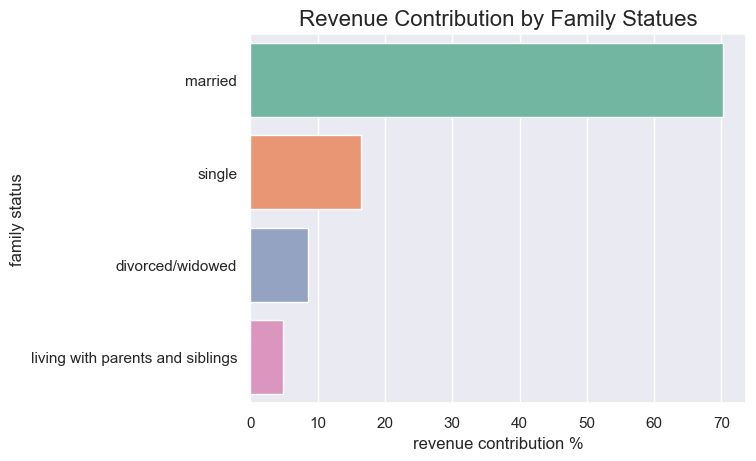

In [167]:
fam_status_rev= sns.barplot(y='fam_status', x='rev_percent', 
                            data = df_kids_fam_status, palette='Set2')

fam_status_rev.set(xlabel='revenue contribution %', ylabel='family status')
fam_status_rev.set_title("Revenue Contribution by Family Statues", fontsize=16)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Customers by Family Status')

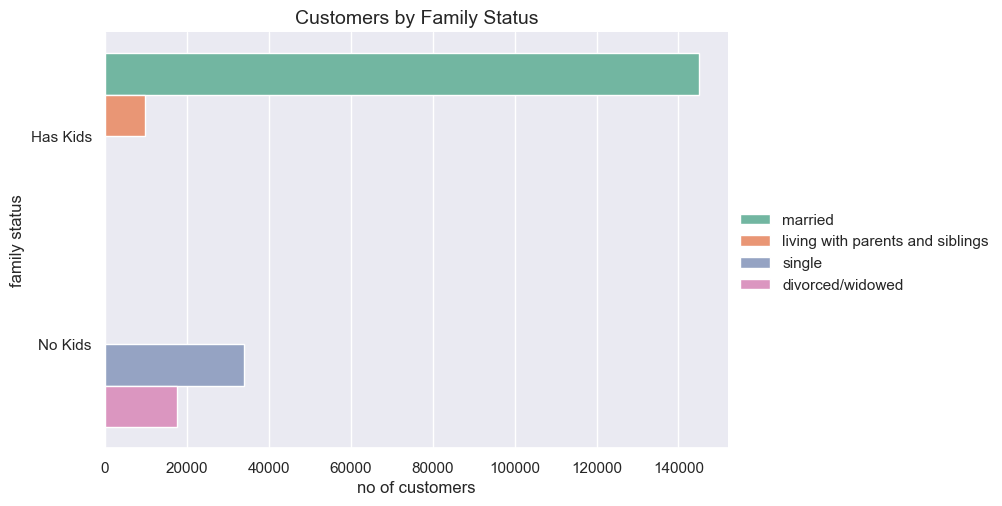

In [168]:
df_kids_fam_status.sort_values(by='kids_flag', ascending=True, inplace=True)
fam_status_kids_flag = sns.catplot(x='user_id', y='kids_flag', hue='fam_status',
                    data = df_kids_fam_status, kind='bar', palette="Set2", aspect=6.7/4.27)

fam_status_kids_flag.set_axis_labels("no of customers", "family status")
fam_status_kids_flag.legend.set_title("")
plt.title("Customers by Family Status", fontsize=14)

In [169]:
# Export bar graphs
fam_status_kids_flag.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam_status_customers.png'), bbox_inches = 'tight')
fam_status_rev.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_fam_status_rev.png'), bbox_inches = 'tight')

#### Observations

1. Married and 'Living with parents and siblings' have kids
2. Single, divorced/widowed have no kids
3. 70% of customers are married and generate 70% of revenue

### 8.3 Ordering Habits of Married Customers

#### Subset married customers

In [170]:
# subset married customers 
df_married = df_dept_cust_ords[df_dept_cust_ords['fam_status'] == 'married']
df_married.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'reordered', 'product_name', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busy_slow_days', 'busiest_hours',
       'max_orders', 'loyalty_flag', 'mean_expenses', 'spender_type',
       'median_days_prior_purchase', 'frequency_cust_type', 'gender', 'state',
       'age', 'n_dependants', 'fam_status', 'income', 'region',
       'activity_type', 'department', 'kids_flag'],
      dtype='object')

#### Hours of the day married customers order

In [105]:
# subset columns orders hours and orders for married customers
df_ohod_orders = df_married[['order_hour_of_day', 'order_id']]
df_group_hours_orders = df_ohod_orders.groupby('order_hour_of_day', as_index=False)['order_id'].count()

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


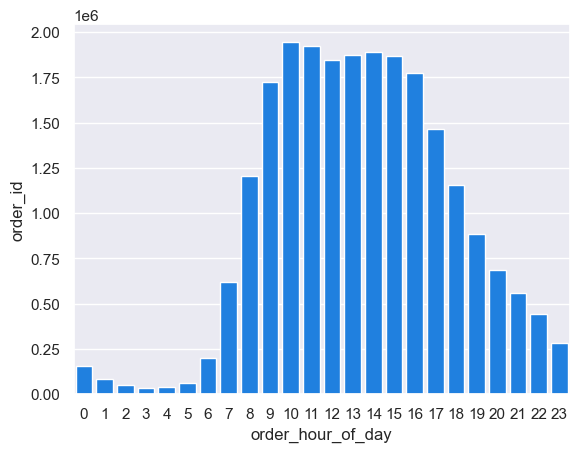

In [108]:
line_ohod_orders_married = sns.barplot(x='order_hour_of_day', 
                                        y='order_id', data=df_group_hours_orders,
                                      color='#0080ff')

In [ ]:
#line_ohod_prices_married = sns.lineplot(x='order_hour_of_day', y='prices', data=df_ohod_prices)

#### Top 5 departments

In [109]:
# group married customers by departments and count orders and total revenue
df_dept_married= df_married.groupby(['department_id', 'department'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_dept_married.sort_values(by=['order_id'], ascending=False, inplace=True)

In [110]:
# order by prices to get the top departments
df_top5_dept_married= df_dept_married.sort_values(by=['prices'], ascending=False).iloc[:5]

In [111]:
df_top5_dept_married

,department_id,department,order_id,prices
3,4,produce,6654218,53081312.0
15,16,dairy eggs,3788598,31531686.0
6,7,beverages,1889052,14513897.0
0,1,frozen,1569050,12139910.0
12,13,pantry,1318340,10558627.0


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Top 5 Departments of Married Customers')

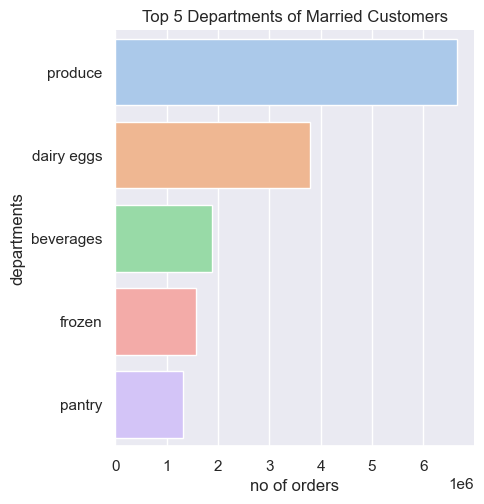

In [112]:
# draw bar graph to see the top departments and orders distribution
bar_top5_dept_married = sns.catplot(x='order_id', y='department' , 
                                    data=df_top5_dept_married, kind='bar', palette='pastel')
bar_top5_dept_married.set_axis_labels("no of orders", "departments")
plt.title('Top 5 Departments of Married Customers', fontsize='12')

In [113]:
# subset list of rows with top 5 departments
df_dept_reorder = df_married.loc[df_married['department_id'].isin([4,16,7,1,13])][['department', 
                                            'reordered', 'order_id']]
df_dept_reorder.shape

(15219258, 3)

In [114]:
# group by department, reorder to see number of reorders by department
df_dept_reorder_group = df_dept_reorder.groupby(['department', 'reordered'], as_index=False).agg({
    'order_id':'count'
})
df_dept_reorder_group.sort_values(by=['order_id'], ascending=False, inplace=True)
df_dept_reorder_group

,department,reordered,order_id
9,produce,1,4323726
3,dairy eggs,1,2535422
8,produce,0,2330492
2,dairy eggs,0,1253176
1,beverages,1,1233690
6,pantry,0,862294
5,frozen,1,849505
4,frozen,0,719545
0,beverages,0,655362
7,pantry,1,456046


#### Grouped bar chart

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Number of Orders Redoreded within Top 5 Departments')

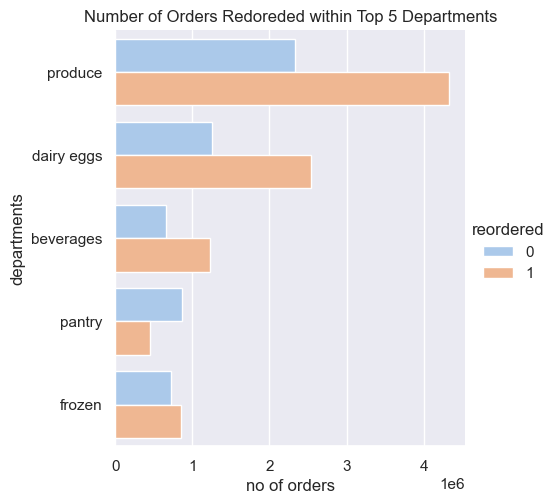

In [115]:
# bar graph to see the reorders ratios of each department
bar_top5_dept_married_reorder = sns.catplot(x='order_id', y='department', hue='reordered',
                        data=df_dept_reorder_group, kind='bar', palette='pastel')
bar_top5_dept_married_reorder.set_axis_labels("no of orders", "departments")
plt.title('Number of Orders Redoreded within Top 5 Departments', fontsize='12')

In [116]:
# Export bar graphs
bar_top5_dept_married.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_top5_dept_married.png'), bbox_inches = 'tight')
bar_top5_dept_married_reorder.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/bar_top5_dept_married_reorder.png'), bbox_inches = 'tight')

#### Stacked bar: Ratio of new and reorders by top 5 departments

In [117]:
# need to transpose the data and get count of orders of ordered once and reorders

# subset items from top 5 departments ordered once
df_dept_reorder_0 = df_dept_reorder_group[df_dept_reorder_group['reordered']==0]
df_dept_reorder_0

,department,reordered,order_id
8,produce,0,2330492
2,dairy eggs,0,1253176
6,pantry,0,862294
4,frozen,0,719545
0,beverages,0,655362


In [118]:
# subset items from top 5 departments reordered
df_dept_reorder_1 = df_dept_reorder_group[df_dept_reorder_group['reordered']==1]
df_dept_reorder_1

,department,reordered,order_id
9,produce,1,4323726
3,dairy eggs,1,2535422
1,beverages,1,1233690
5,frozen,1,849505
7,pantry,1,456046


In [119]:
# merge the orders and reorders to gether. Rename columns
df_merge_reorder = df_dept_reorder_0.merge(df_dept_reorder_1, how='inner', on='department')
df_merge_reorder = df_merge_reorder.rename(columns={'reordered_x' : 'ordered_once', 
                 'order_id_x':'orders_ordered_once','reordered_y':'reordered', 'order_id_y': 'orders_reordered'
            })
df_merge_reorder

,department,ordered_once,orders_ordered_once,reordered,orders_reordered
0,produce,0,2330492,1,4323726
1,dairy eggs,0,1253176,1,2535422
2,pantry,0,862294,1,456046
3,frozen,0,719545,1,849505
4,beverages,0,655362,1,1233690


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'pantry'),
  Text(3, 0, 'frozen'),
  Text(4, 0, 'beverages')])

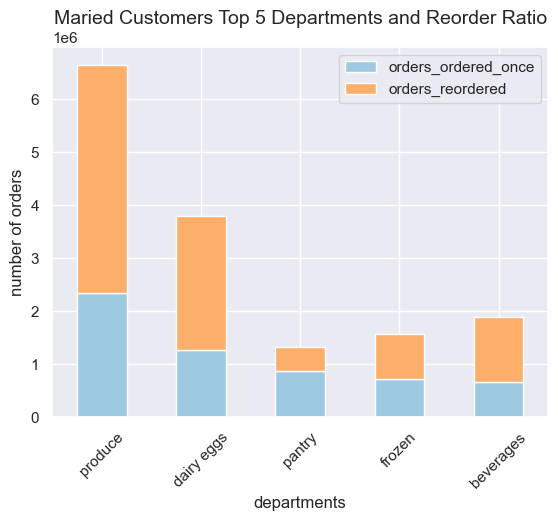

In [120]:
# Stacked bar by resetting the index and subsetting the required columns
stacked_bar_married = df_merge_reorder[['department','orders_ordered_once', 
                  'orders_reordered']].set_index('department').plot(
    kind='bar', stacked=True, color=['#9ecae1','#fdae6b'])

#add overall title
plt.title('Maried Customers Top 5 Departments and Reorder Ratio', fontsize=14)

#add axis titles
plt.xlabel('departments')
plt.ylabel('number of orders')

#rotate x-axis labels
plt.xticks(rotation=45)

In [ ]:
stacked_bar_married.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/stackedbar_married_top5_dept.png'), bbox_inches = 'tight')


#### Observation:

1. Produce, dairy eggs, beverages and frozen are the same top 4 items as rest of the customer base

2. But instead of snacks, Pantry items are purchased more frequently

#### Bottom 5 Departments

In [121]:
df_bottom5_dept_married= df_dept_married.sort_values(by=['prices'], ascending=True).iloc[:5]

In [122]:
df_bottom5_dept_married

,department_id,department,order_id,prices
1,2,other,25205,176570.906250
9,10,bulk,24621,205243.796875
20,21,missing,48486,418845.812500
7,8,pets,67513,530656.687500
4,5,alcohol,105682,865500.625000


####  Top 10 pantry items married couples purchase

In [123]:
df_pantry = df_married[df_married['department'] == 'pantry']
df_pantry.shape

(1318340, 30)

In [124]:
df_pantry_items_married= df_pantry.groupby(['product_id', 'product_name'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_pantry_items_married.sort_values(by=['order_id'], ascending=False, inplace=True)

In [125]:
df_pantry_items_married.iloc[:10]

,product_id,product_name,order_id,prices
2561,31506,Extra Virgin Olive Oil,34659,197556.296875
2448,30450,Creamy Almond Butter,15095,48304.000000
829,16953,Creamy Peanut Butter,13976,160724.000000
4025,43713,Organic Creamy Peanut Butter,12612,116030.398438
1003,18441,Organic Ketchup,10674,84324.601562
3864,42356,Strawberry Preserves,10652,149128.000000
407,13535,Organic Medium Salsa,10367,10367.000000
435,13829,Mild Salsa,10188,131425.203125
1314,21195,Organic Extra Virgin Olive Oil,9417,128071.203125
1566,23537,Light Brown Sugar,9375,81562.500000


#### Top 10 products

In [126]:
df_items_married= df_married.groupby(['product_id', 'product_name'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_items_married.sort_values(by=['order_id'], ascending=False, inplace=True)

In [127]:
df_items_married.iloc[:10]

,product_id,product_name,order_id,prices
16463,24852,Banana,331141,4.073034e+06
3517,13176,Bag of Organic Bananas,266504,2.744991e+06
12348,21137,Organic Strawberries,185691,1.355544e+06
13199,21903,Organic Baby Spinach,169850,1.392770e+06
41206,47209,Organic Hass Avocado,149915,5.996600e+05
41822,47766,Organic Avocado,124790,7.861770e+05
41668,47626,Large Lemon,107310,1.502340e+06
7533,16797,Strawberries,100512,1.306656e+05
17965,26209,Limes,98636,1.449949e+06
19777,27845,Organic Whole Milk,97143,1.243430e+06


#### Observations

1. Married customers top 10 prefrered items are the same as all customer base

### 8.4 Ordering habits of groups with no kids

In [171]:
# subset living with parents and siblings customers 
df_no_kids = df_dept_cust_ords[df_dept_cust_ords['kids_flag'] == 'No Kids']

In [175]:
df_no_kids.groupby(['fam_status'])['user_id'].count()

fam_status
divorced/widowed    2771812
single              5325691
Name: user_id, dtype: int64

In [184]:
# group customers with no kids by departments and count orders and total revenue
df_dept_no_kids= df_no_kids.groupby(['department', 'department_id']
                    ).agg({'order_id': 'count', 'prices': 'sum'})

df_dept_no_kids.sort_values(by=['order_id'], ascending=False, inplace=True)

#### Top 5 departments of no kids

In [185]:
# order by prices to get the top departments
df_top5_dept_no_kids= df_dept_no_kids.sort_values(by=['prices'], ascending=False).iloc[:5]

In [186]:
df_top5_dept_no_kids

,,order_id,prices
department,department_id,,
produce,4,2375445,18982172.00
dairy eggs,16,1349362,11248251.00
beverages,7,674442,5174139.50
frozen,1,557160,4314367.50
pantry,13,466757,3738976.75


### 8.5 Ordering habits of customers living with parents and siblings

#### Top 5 departments for living with parents

In [176]:
df_living_with_kids =  df_dept_cust_ords[df_dept_cust_ords['fam_status'] == 'living with parents and siblings']
df_living_with_kids.shape

(1550603, 31)

In [191]:
# group customers with no kids by departments and count orders and total revenue
df_dept_lwp= df_living_with_kids.groupby(['department', 'department_id']
                    ).agg({'order_id': 'count', 'prices': 'sum'})

df_dept_lwp.sort_values(by=['order_id'], ascending=False, inplace=True)

In [192]:
# order by prices to get the top departments
df_top5_dept_lwp= df_dept_lwp.sort_values(by=['order_id'], ascending=False).iloc[:5]

In [199]:
df_top5_dept_lwp.to_clipboard()

#### Observations:

Living with parents with siblings and have kids have higher orders of snacks than pantry items compared to married customers with kids

#### Top 10 products

In [197]:
df_items_lwp = df_living_with_kids.groupby(['department','product_id', 'product_name'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_items_lwp.sort_values(by=['order_id'], ascending=False, inplace=True)

In [204]:
df_items_lwp.iloc[:10]

,department,product_id,product_name,order_id,prices
29749,produce,24852,Banana,22953,282321.906250
29383,produce,13176,Bag of Organic Bananas,17899,184359.703125
29641,produce,21137,Organic Strawberries,12316,89906.804688
29667,produce,21903,Organic Baby Spinach,11605,95161.000000
30468,produce,47209,Organic Hass Avocado,9637,38548.000000
30483,produce,47766,Organic Avocado,8403,52938.902344
30477,produce,47626,Large Lemon,7123,99722.000000
29503,produce,16797,Strawberries,6671,8672.299805
29786,produce,26209,Limes,6634,97519.796875
9281,dairy eggs,27845,Organic Whole Milk,6455,82624.000000


## 9. High vs Low Income 

### 9.1 Create income flags ( < 200,000 and > 200,000)

In [205]:
df_dept_cust_ords.shape

(32404859, 31)

In [206]:
# create income flag - Low income for under 200,000 and High income over 200,000
df_dept_cust_ords.loc[df_dept_cust_ords['income'] <= 200000, 'income_flag'] = "Low income"
df_dept_cust_ords.loc[df_dept_cust_ords['income'] > 200000, 'income_flag'] = "High income"

/var/folders/6w/mdyngzzd2_z7brmk404qky_m0000gs/T/ipykernel_97849/1154397926.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_dept_cust_ords.loc[df_dept_cust_ords['income'] <= 200000, 'income_flag'] = "Low income"


In [207]:
# check the value counts of income flag
df_dept_cust_ords['income_flag'].value_counts()

income_flag
Low income     32146416
High income      258443
Name: count, dtype: int64

In [208]:
# check head and tail of dataframe to ensure the conditions were correct
df_dept_cust_ords.loc[df_dept_cust_ords['income'] <= 200000][['income', 
                                            'income_flag']].tail(5)

,income,income_flag
32404854,55497,Low income
32404855,55497,Low income
32404856,55497,Low income
32404857,55497,Low income
32404858,55497,Low income


In [209]:
df_dept_cust_ords.shape

(32404859, 32)

### 9.2 Customers and Revenue by Income

In [210]:
# subset dataset to columns required
df_income_subset = df_dept_cust_ords[['order_id', 'number_of_orders', 'user_id',
                    'product_id', 'product_name', 'department_id','department',
                    'mean_expenses', 'spender_type','median_days_prior_purchase',
                    'age', 'fam_status', 'n_dependants', 'activity_type', 'income_flag',
                    'prices', 'reordered', 'region']]

In [211]:
df_income_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    object 
 1   number_of_orders            int8   
 2   user_id                     object 
 3   product_id                  object 
 4   product_name                object 
 5   department_id               int8   
 6   department                  object 
 7   mean_expenses               float32
 8   spender_type                object 
 9   median_days_prior_purchase  float32
 10  age                         int8   
 11  fam_status                  object 
 12  n_dependants                int8   
 13  activity_type               object 
 14  income_flag                 object 
 15  prices                      float32
 16  reordered                   int8   
 17  region                      object 
dtypes: float32(3), int8(5), object(10)
memory usage: 2.9+ GB


In [212]:
df_income_stats = df_income_subset.groupby(['income_flag'], as_index=False).agg({
    'prices': 'sum', 'order_id': 'count', 'user_id':'nunique'
})
df_income_stats

,income_flag,prices,order_id,user_id
0,High income,1.989055e+06,258443,1004
1,Low income,2.504371e+08,32146416,205205


In [213]:
total_revenue = df_income_stats['prices'].sum()
total_customers = df_income_stats['user_id'].sum()

In [214]:
df_income_stats['revenue_%'] = (df_income_stats['prices'] / total_revenue *100)
df_income_stats['customer_%'] = (df_income_stats['user_id'] / total_customers *100)
df_income_stats

,income_flag,prices,order_id,user_id,revenue_%,customer_%
0,High income,1.989055e+06,258443,1004,0.787975,0.486885
1,Low income,2.504371e+08,32146416,205205,99.212029,99.513115


In [215]:
df_income_stats.to_clipboard()

#### Observation:
99% of revenue is from Low income

### 9.3 Reorder Rate

In [216]:
# group by income flag and reordered flag
df_income_reorder = df_income_subset.groupby(['income_flag', 'reordered'], as_index=False).agg({
    'order_id': 'count' })
df_income_reorder

,income_flag,reordered,order_id
0,High income,0,106109
1,High income,1,152334
2,Low income,0,13193257
3,Low income,1,18953159


In [217]:
# to transpose and merge with income stats, created separate dataframe for reordered rates
# and merged them to reordered values will become columns
df_income_reorder_0 = df_income_reorder[df_income_reorder['reordered'] == 0]
df_income_reorder_1 = df_income_reorder[df_income_reorder['reordered'] == 1]
df_income_reorder_merge = df_income_reorder_0.merge(df_income_reorder_1,how='inner', on='income_flag')

In [218]:
# renamed columns
df_income_reorder_merge = df_income_reorder_merge.rename(columns={
    'order_id_x': 'ordered_once', 'order_id_y': 'reordered'
})

In [219]:
# Dropped the reordered_x and reordered_y columns
df_income_reorder_merge.drop(columns=['reordered_x','reordered_y'], inplace=True)
df_income_reorder_merge

,income_flag,ordered_once,reordered
0,High income,106109,152334
1,Low income,13193257,18953159


In [220]:
# merged the income stats with income reorder dataframe
df_income_stats_reorder = df_income_stats.merge(df_income_reorder_merge, 
                                        how='left', on='income_flag')
df_income_stats_reorder

,income_flag,prices,order_id,user_id,revenue_%,customer_%,ordered_once,reordered
0,High income,1.989055e+06,258443,1004,0.787975,0.486885,106109,152334
1,Low income,2.504371e+08,32146416,205205,99.212029,99.513115,13193257,18953159


In [221]:
df_income_stats_reorder['reorder_percent']= (df_income_stats_reorder['reordered'] / (df_income_stats_reorder['reordered'] + 
         df_income_stats_reorder['ordered_once']) *100)
df_income_stats_reorder

,income_flag,prices,order_id,user_id,revenue_%,customer_%,ordered_once,reordered,reorder_percent
0,High income,1.989055e+06,258443,1004,0.787975,0.486885,106109,152334,58.942978
1,Low income,2.504371e+08,32146416,205205,99.212029,99.513115,13193257,18953159,58.958856


#### Observations:

Higer and lower income customers reordered items over 50% of times

In [222]:
# check department preferences of high income

### 9.4 Department Preferences by Low Income Earners

In [223]:
# subset low income earners
df_low_income = df_income_subset[df_income_subset['income_flag'] == 'Low income']
df_low_income.shape

(32146416, 18)

In [224]:
df_low_income_dept = df_low_income.groupby(['department_id','department'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum' })
# sort by order_id desc and grab first 5 rows
df_top5 = df_low_income_dept.sort_values(by=['order_id'], ascending=False).iloc[:5]
df_top5

,department_id,department,order_id,prices
3,4,produce,9429010,75250400.0
15,16,dairy eggs,5353725,44614532.0
18,19,snacks,2864231,12244955.0
6,7,beverages,2663165,20453634.0
0,1,frozen,2214548,17130518.0


In [225]:
# group by department and reorder
df_low_income_reorder = df_low_income.groupby(['department_id','department', 'reordered'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum' })


In [226]:
# subset to top5 departments
df_income_top5_reorder = df_low_income_reorder[df_low_income_reorder['department_id'].isin(
                            df_top5['department_id'].tolist())]

In [227]:
# transport the df_income_top5_reorder to have reorder be columns and rename columns
df_income_top5_reorder_1 = df_income_top5_reorder[df_income_top5_reorder['reordered']==1]
df_income_top5_reorder_0 = df_income_top5_reorder[df_income_top5_reorder['reordered']==0]
df_income_top5_reorder_t = df_income_top5_reorder_1.merge(
            df_income_top5_reorder_0, how='inner', on='department_id'
)
df_income_top5_reorder_t = df_income_top5_reorder_t.rename(columns={'order_id_x':'orders_reordered', 
                    'prices_x': 'reordered_rev','order_id_y': 'orders_oredered_once',
                    'prices_y': 'ordered_once_rev', 'department_x': 'department'})
df_income_top5_reorder_t

,department_id,department,reordered_x,orders_reordered,reordered_rev,department_y,reordered_y,orders_oredered_once,ordered_once_rev
0,1,frozen,1,1199372,9252579.0,frozen,0,1015176,7877940.0
1,4,produce,1,6128031,49228560.0,produce,0,3300979,26021840.0
2,7,beverages,1,1739854,13339553.0,beverages,0,923311,7114080.0
3,16,dairy eggs,1,3585491,29961132.0,dairy eggs,0,1768234,14653398.0
4,19,snacks,1,1644861,7034459.5,snacks,0,1219370,5210496.0


In [228]:
df_income_top5_reorder_t.drop(columns=['reordered_x', 'department_y', 'reordered_y'], inplace=True)
df_income_top5_reorder_t

,department_id,department,orders_reordered,reordered_rev,orders_oredered_once,ordered_once_rev
0,1,frozen,1199372,9252579.0,1015176,7877940.0
1,4,produce,6128031,49228560.0,3300979,26021840.0
2,7,beverages,1739854,13339553.0,923311,7114080.0
3,16,dairy eggs,3585491,29961132.0,1768234,14653398.0
4,19,snacks,1644861,7034459.5,1219370,5210496.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'beverages'),
  Text(3, 0, 'snacks'),
  Text(4, 0, 'frozen')])

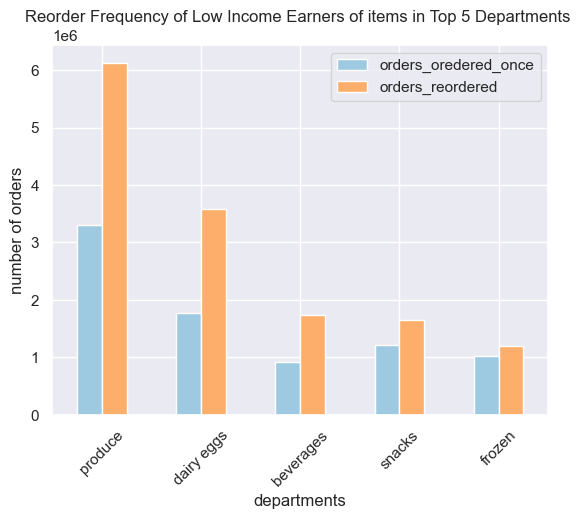

In [229]:
# Stacked bar by resetting the index and subsetting the required columns
df_income_top5_reorder_t.sort_values(by='orders_reordered', ascending=False, inplace=True)
stacked_bar_low_income = df_income_top5_reorder_t[['department','orders_oredered_once', 
                  'orders_reordered']].set_index('department').plot(
    kind='bar', stacked=False, color=['#9ecae1','#fdae6b'])

#add overall title
plt.title('Reorder Frequency of Low Income Earners of items in Top 5 Departments ', 
          fontsize=12)

#add axis titles
plt.xlabel('departments')
plt.ylabel('number of orders')

#rotate x-axis labels
plt.xticks(rotation=45)

In [230]:
# export the bar graph
stacked_bar_low_income.figure.savefig(os.path.join(path, 
            '04 Analysis/Visualizations/stacked_bar_low_income.png'), bbox_inches = 'tight')


### 9.5 Department Preferences by High Income Earners

In [231]:
# subset low income earners
df_high_income = df_income_subset[df_income_subset['income_flag'] == 'High income']
df_high_income.shape

(258443, 18)

In [232]:
df_high_income_dept = df_high_income.groupby(['department_id','department'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum' })
# sort by order_id desc and grab first 5 rows
df_top5_high = df_high_income_dept.sort_values(by=['order_id'], ascending=False).iloc[:5]
df_top5_high

,department_id,department,order_id,prices
3,4,produce,50281,410534.00000
15,16,dairy eggs,45022,341594.40625
6,7,beverages,24958,192501.90625
18,19,snacks,23319,100582.50000
0,1,frozen,20195,158688.09375


In [233]:
# group by department and reorder
df_high_income_reorder = df_high_income.groupby(['department_id','department', 'reordered'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum' })


In [234]:
# subset to top5 departments
df_high_income_top5_reorder = df_high_income_reorder[df_high_income_reorder['department_id'].isin(
                           df_top5_high['department_id'].tolist())]

In [235]:
# transport the df_income_top5_reorder to have reorder be columns and rename columns
df_hincome_top5_reorder_1 = df_high_income_top5_reorder[df_high_income_top5_reorder['reordered']==1]
df_hincome_top5_reorder_0 = df_high_income_top5_reorder[df_high_income_top5_reorder['reordered']==0]
df_hincome_top5_reorder_t = df_hincome_top5_reorder_1.merge(
            df_hincome_top5_reorder_0, how='inner', on='department_id'
)
df_hincome_top5_reorder_t = df_hincome_top5_reorder_t.rename(columns={'order_id_x':'orders_reordered', 
                    'prices_x': 'reordered_rev','order_id_y': 'orders_oredered_once',
                    'prices_y': 'ordered_once_rev', 'department_x': 'department'})
df_hincome_top5_reorder_t

,department_id,department,reordered_x,orders_reordered,reordered_rev,department_y,reordered_y,orders_oredered_once,ordered_once_rev
0,1,frozen,1,11332,88824.398438,frozen,0,8863,69863.703125
1,4,produce,1,32679,270215.906250,produce,0,17602,140318.093750
2,7,beverages,1,16730,128162.898438,beverages,0,8228,64339.000000
3,16,dairy eggs,1,29994,226621.093750,dairy eggs,0,15028,114973.296875
4,19,snacks,1,13112,56775.000000,snacks,0,10207,43807.500000


In [236]:
df_hincome_top5_reorder_t.drop(columns=['reordered_x', 'department_y', 'reordered_y'], inplace=True)
df_hincome_top5_reorder_t

,department_id,department,orders_reordered,reordered_rev,orders_oredered_once,ordered_once_rev
0,1,frozen,11332,88824.398438,8863,69863.703125
1,4,produce,32679,270215.906250,17602,140318.093750
2,7,beverages,16730,128162.898438,8228,64339.000000
3,16,dairy eggs,29994,226621.093750,15028,114973.296875
4,19,snacks,13112,56775.000000,10207,43807.500000


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'produce'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'beverages'),
  Text(3, 0, 'snacks'),
  Text(4, 0, 'frozen')])

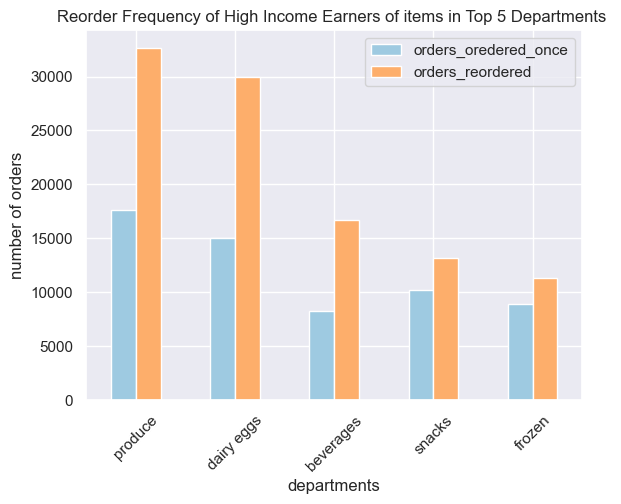

In [237]:
df_hincome_top5_reorder_t.sort_values(by='orders_reordered', ascending=False, inplace=True)
# Stacked bar by resetting the index and subsetting the required columns
stacked_bar_high_income = df_hincome_top5_reorder_t[['department','orders_oredered_once', 
                  'orders_reordered']].set_index('department').plot(
    kind='bar', stacked=False, color=['#9ecae1','#fdae6b'])

#add overall title
plt.title('Reorder Frequency of High Income Earners of items in Top 5 Departments ', 
          fontsize=12)

#add axis titles
plt.xlabel('departments')
plt.ylabel('number of orders')

#rotate x-axis labels
plt.xticks(rotation=45)

In [238]:
# export the bar graph
stacked_bar_high_income.figure.savefig(os.path.join(path, 
        '04 Analysis/Visualizations/stacked_bar_high_income.png'), bbox_inches = 'tight')

#### Top 10 Preferred Products of Low Income Earners

In [239]:
df_items_low_income= df_low_income.groupby(['department', 'product_name'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_items_low_income.sort_values(by=['order_id'], ascending=False, inplace=True)



In [240]:
df_items_low_income = df_items_low_income.iloc[:10]

In [241]:
df_items_low_income.to_clipboard()

#### Top 10 products of High income earners

In [242]:
df_items_high_income= df_high_income.groupby(['department', 'product_name'], 
                    as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

df_items_high_income.sort_values(by=['order_id'], ascending=False, inplace=True)

In [243]:
high_income_top10_items = df_items_high_income.iloc[:10]

In [244]:
high_income_top10_items.to_clipboard()

#### Regions of High income earners

In [245]:
df_high_income_regions = df_high_income.groupby(['region'], 
                            as_index=False).agg({'user_id': 'nunique'})
df_high_income_regions

,region,user_id
0,Midwest,235
1,Northeast,165
2,South,345
3,West,259


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

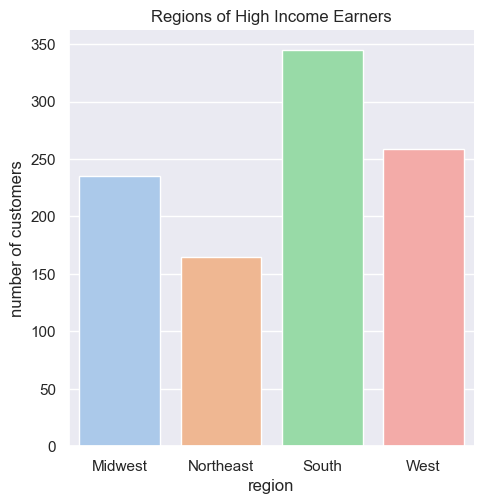

In [246]:
bar_region_high_income = sns.catplot(x='region', y='user_id', data=df_high_income_regions, 
                                palette='pastel', kind='bar')
plt.title('Regions of High Income Earners')
bar_region_high_income.set_axis_labels('region', 'number of customers')

#### Regions of Low income earners

In [247]:
df_low_income_regions = df_low_income.groupby(['region'], 
                            as_index=False).agg({'user_id': 'nunique'})
df_low_income_regions

,region,user_id
0,Midwest,48284
1,Northeast,36223
2,South,68392
3,West,52306


/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

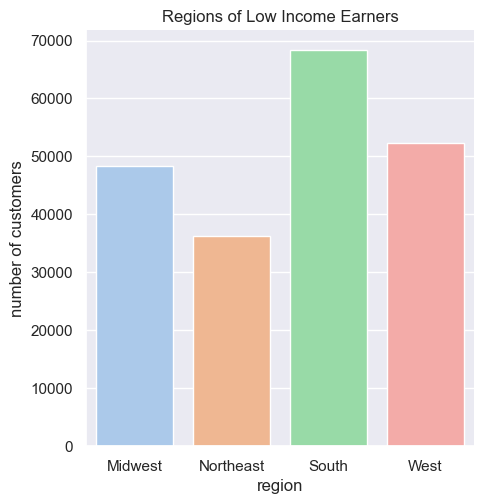

In [248]:
bar_region_low_income = sns.catplot(x='region', y='user_id', data=df_low_income_regions, 
                                palette='pastel', kind='bar')

plt.title('Regions of Low Income Earners')
bar_region_low_income.set_axis_labels('region', 'number of customers')

#### Age distribution amongst high income earners.

In [249]:
# group by age
df_high_income_age = df_high_income.groupby(['age'], as_index=False).agg({'user_id': 'nunique', 
                'order_id':'count', 'prices':'sum'
            })

df_high_income_age.to_clipboard()

#### Family statuses of high income earners.

In [250]:
# checking for age distribution amongst high income earners
df_high_income_status = df_high_income.groupby(['fam_status'], as_index=False).agg({'user_id': 'nunique', 
                'order_id':'count', 'prices':'sum'
            })

df_high_income_status

,fam_status,user_id,order_id,prices
0,divorced/widowed,103,24742,1.895392e+05
1,living with parents and siblings,18,4175,3.138050e+04
2,married,742,188737,1.453254e+06
3,single,141,40789,3.148819e+05


### 10. Export Dataset

In [251]:
df_dept_cust_ords.to_pickle(os.path.join(path, 
            '02 Data/Prepared Data/ords_prod_cust_departments_kids.pkl'))